In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
thptqg_scores=pd.read_csv('diem_thi_thpt_2024.csv',dtype={'sbd':str})
thptqg_scores.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,01000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1
1,01000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1
2,01000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1
3,01000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1
4,01000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1


In [3]:
diem_ngoai_ngu = thptqg_scores['ngoai_ngu'].dropna()

bins=np.round(np.arange(0,10.2,0.2),1)

count_diem_ngoai_ngu = diem_ngoai_ngu.value_counts().reindex(bins,fill_value = 0).sort_index()

diem = count_diem_ngoai_ngu.index
soluong = count_diem_ngoai_ngu.values


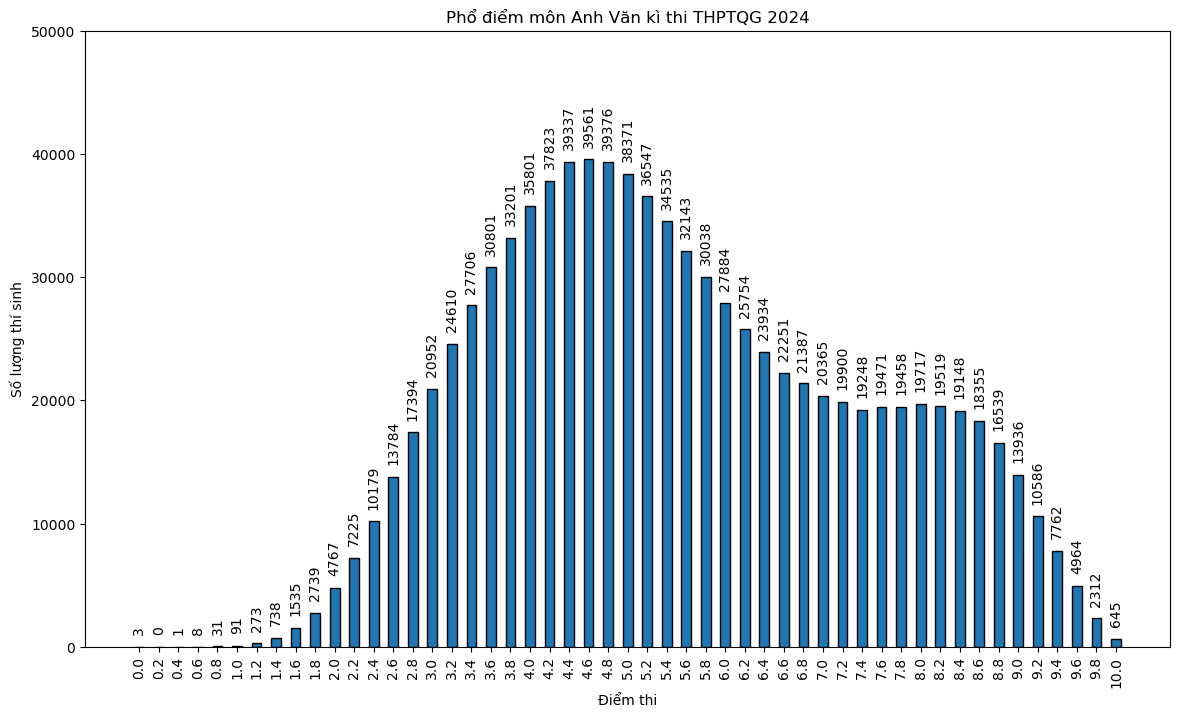

In [4]:
plt.figure(figsize=(14,8))
bar_chart = plt.bar(diem,soluong,width=0.1,edgecolor='k')

for bar in bar_chart:
    y_height = bar.get_height()
    
    plt.text(bar.get_x() + bar.get_width()/2, y_height + 1000, int(y_height), va = 'bottom',ha='center' ,rotation=90)


plt.title('Phổ điểm môn Anh Văn kì thi THPTQG 2024')
plt.xlabel('Điểm thi')
plt.ylabel('Số lượng thí sinh')
plt.xticks(ticks=diem,labels=[f'{x:.1f}' for x in diem],rotation=90)
plt.yticks(np.arange(0,60000,10000))


plt.show()


In [5]:
#Điểm thi các thành phố lớn
sbd_HCM = thptqg_scores[thptqg_scores['sbd'].astype(str).str.startswith('02')]
HCM_ngoai_ngu = sbd_HCM['ngoai_ngu'].value_counts().reindex(bins,fill_value=0).sort_index()


sbd_HaNoi = thptqg_scores[thptqg_scores['sbd'].astype(str).str.startswith('01')]
HaNoi_ngoai_ngu = sbd_HaNoi['ngoai_ngu'].value_counts().reindex(bins,fill_value=0).sort_index()


sbd_DaNang = thptqg_scores[thptqg_scores['sbd'].astype(str).str.startswith('04')]
DaNang_ngoai_ngu = sbd_DaNang['ngoai_ngu'].value_counts().reindex(bins,fill_value=0).sort_index()


sbd_CanTho = thptqg_scores[thptqg_scores['sbd'].astype(str).str.startswith('55')]
CanTho_ngoai_ngu = sbd_CanTho['ngoai_ngu'].value_counts().reindex(bins,fill_value=0).sort_index()




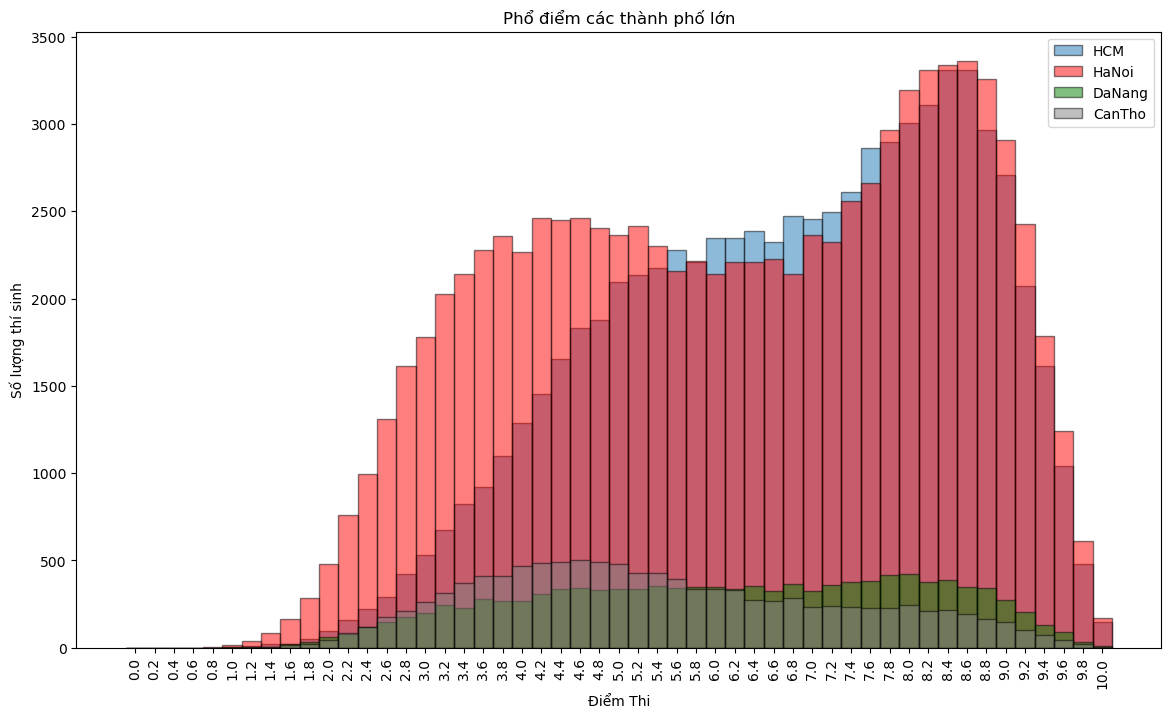

In [6]:
plt.figure(figsize=(14,8))

plt.bar(HCM_ngoai_ngu.index,HCM_ngoai_ngu.values,width=0.2,edgecolor='k',alpha=0.5,label='HCM')
plt.bar(HaNoi_ngoai_ngu.index,HaNoi_ngoai_ngu.values,width=0.2,color='red',edgecolor='k',alpha=0.5,label='HaNoi')
plt.bar(DaNang_ngoai_ngu.index,DaNang_ngoai_ngu.values,width=0.2,color='green',edgecolor='k',alpha=0.5,label='DaNang')
plt.bar(CanTho_ngoai_ngu.index,CanTho_ngoai_ngu.values,width=0.2,color='grey',edgecolor='k',alpha=0.5,label='CanTho')

plt.title('Phổ điểm các thành phố lớn')
plt.xlabel('Điểm Thi')
plt.ylabel('Số lượng thí sinh')
plt.xticks(ticks=bins,labels=[f'{x:.1f}' for x in bins],rotation= 90)
plt.legend();
plt.show()

mean_big_cities: 6.362861809371348
mean_whole_countries: 5.521937975578091


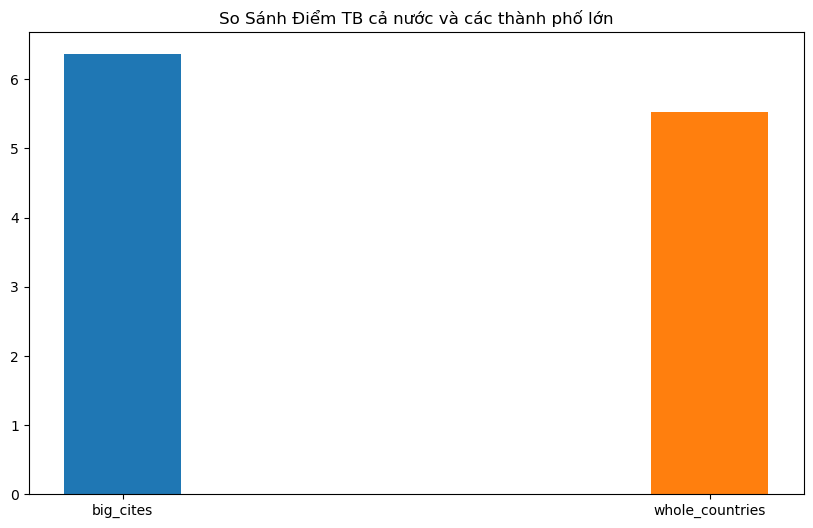

In [7]:
big_cities_score = pd.concat([sbd_HCM['ngoai_ngu'],sbd_HaNoi['ngoai_ngu'],sbd_DaNang['ngoai_ngu'],sbd_CanTho['ngoai_ngu']]).dropna()
mean_big_cities=big_cities_score.mean()

print(f"mean_big_cities: {mean_big_cities}")
whole_country_ngoai_ngu = thptqg_scores['ngoai_ngu'].astype(float)
mean_whole_country = whole_country_ngoai_ngu.mean()
print(f"mean_whole_countries: {mean_whole_country}")

plt.figure(figsize=(10,6))

plt.bar('big_cites',mean_big_cities,width=0.2)
plt.bar('whole_countries',mean_whole_country,width=0.2)
plt.title('So Sánh Điểm TB cả nước và các thành phố lớn')
plt.show()


***KIỂM ĐỊNH GIẢ THUYẾT THỐNG KÊ***  
  
  Từ phổ điểm thi THPTQG 2024 môn Ngoại Ngữ của cả nước ta thấy, phổ điểm có dạng multimodel distribution(phân phối đa thức). Ta dự đoán rằng, phổ điểm như vậy xuất phát từ việc khả năng tiếp cận ngoại ngữ của 2 nhóm học sinh ở các thành phố lớn và các tỉnh khác có sự chênh lệch lớn nên mới có dạng phân phối như vậy  
    
    Ta kiểm định giả thuyết


In [8]:
t_test, p_value = stats.ttest_ind(big_cities_score,diem_ngoai_ngu)

print(f'T-Statistic: {t_test}')
print(f'p-Value: {p_value}')

if p_value < 0.05:
    print("Có cứ để kết luận rằng các thí sinh ở các thành phố lớn có khả năng tiếp cận tiếng anh cao hơn các tỉnh khác")
else:
    print("Không có cứ để kết luận rằng các thí sinh ở các thành phố lớn có khả năng tiếp cận tiếng anh cao hơn các tỉnh khác")

T-Statistic: 173.30449646833256
p-Value: 0.0
Có cứ để kết luận rằng các thí sinh ở các thành phố lớn có khả năng tiếp cận tiếng anh cao hơn các tỉnh khác
